In [2]:
import matplotlib.pyplot as plt 
import numpy as np

C:\Users\Janmejay Mohanty\AppData\Local\Temp\ipykernel_14672\1324113107.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


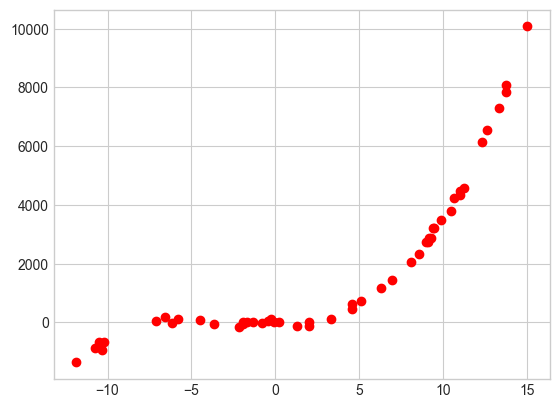

In [3]:
plt.style.use('seaborn-whitegrid') 
noise_scale = 100 
number_of_samples = 50 
x =  30*(np.random.rand(number_of_samples, 1) - 0.5) 
y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 
plt.plot(x,y,'ro') 

m = 6


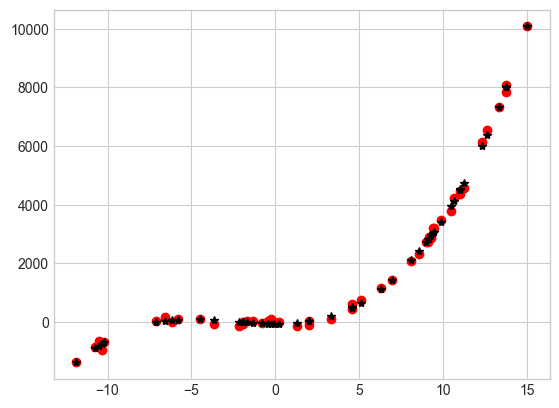

In [4]:
m=np.random.choice([2,3,4,5,6]) # randomly selected m from choices provided
print('m =', m)
curve = np.polyfit(x.flatten(),y.flatten(),m) # list of x, list of y, degree = m
polyn = np.poly1d(curve)    # polynomial created for generating clean y for each x

plt.plot(x,y,'ro')
plt.plot(x,polyn(x),'k*')

Least MSE in testing set is for m= 4
Least MSE in training for m= 8
Therefore, m for which MSE for training and testing set is closest is m = 3 MSE difference is = 3698.059623453373


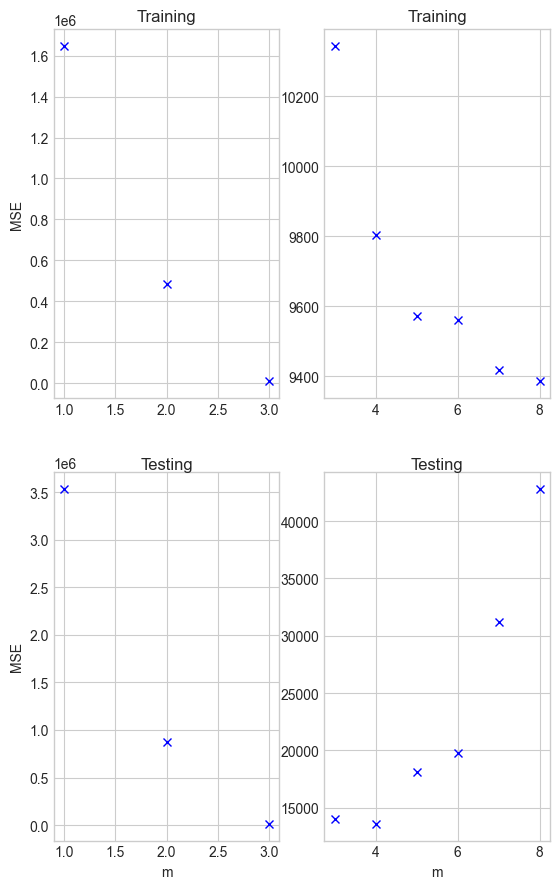

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)
m_list = [1,2,3,4,5,6,7,8]
MSE_list_training = []
MSE_list_testing  = []

for m in m_list:
    curve = np.polyfit(X_train.flatten(),Y_train.flatten(),m)        # only working with training data 
    y_predicted = np.poly1d(curve)                                   # to fit curve
    MSE = np.square(np.subtract(Y_test,y_predicted(X_test))).mean()     # MSE calculated on testing data
    MSE_list_testing.append(MSE)                               # storing MSE for plot against m
    MSE_list_training.append(np.square(np.subtract(Y_train,y_predicted(X_train))).mean())

# Plot    
fig,a = plt.subplots(2,2, squeeze=False)
a[0, 0].plot(m_list[:3], MSE_list_training[:3], 'bx')   # subplot for m=1 to m=3
a[0, 0].set_title('Training')
a[0, 1].plot(m_list[2:], MSE_list_training[2:], 'bx')
a[0, 1].set_title('Training')
a[1, 0].plot(m_list[:3], MSE_list_testing[:3], 'bx')   # subplot for m=3 onwards, for more vivid display
a[1, 0].set_title('Testing', pad=1.08)
a[1, 1].plot(m_list[2:], MSE_list_testing[2:], 'bx')
a[1, 1].set_title('Testing', pad=1.08)
plt.subplots_adjust(top=1.8)
plt.setp(a[-1, :], xlabel='m')
plt.setp(a[:, 0], ylabel='MSE')

MSE_diff = [] # for list of difference 
for m, train, test in zip(m_list, MSE_list_training, MSE_list_testing):
    MSE_diff.append((abs(train-test), m))  
                                                                               

# extracting index of least MSE, and getting corresponding m from m_list
print('Least MSE in testing set is for m=', m_list[MSE_list_testing.index(min(MSE_list_testing))])
print('Least MSE in training for m=', m_list[MSE_list_training.index(min(MSE_list_training))])
# extracting least difference of MSE, and corresponding m 
print('Therefore, m for which MSE for training and testing set is closest is m =', min(MSE_diff)[1], 'MSE difference is =', min(MSE_diff)[0])

Noise scale 	 MSE
200 	 35284.50124784165
300 	 87932.28038780365
400 	 176821.94182874585
600 	 246959.33682722278
800 	 368767.11033434054
1000 	 688182.9239025721


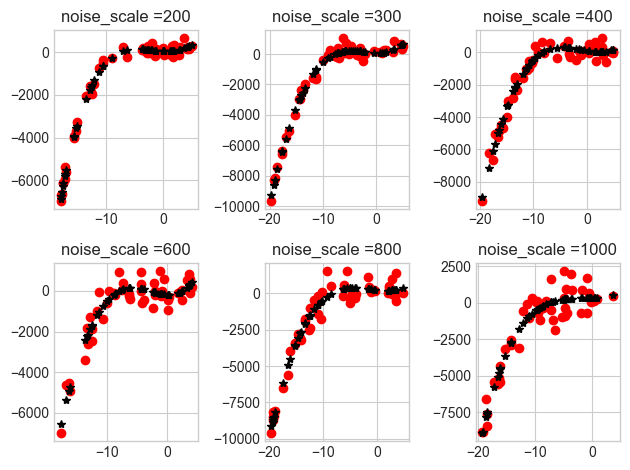

In [11]:
noise_list = [200, 300, 400, 600, 800, 1000]
number_of_samples = 50
m = 4      # found in 2
MSE_list = []

print('Noise scale \t MSE')
for index, noise_scale in enumerate(noise_list):
    x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
    y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)    
    curve = np.polyfit(x.flatten(), y.flatten(), m)       
    y_predicted = np.poly1d(curve)                                   
    MSE = np.square(np.subtract(y,y_predicted(x))).mean()     # MSE calculated 
    MSE_list.append(MSE)                              # storing MSE for comparison with noise_scale
    
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    plt.subplot(2,3,index+1)
    plt.plot(x,y,'ro')                          # plotting test data and data predicted with m=4
    plt.plot(x,y_predicted(x),'k*')
    plt.title('noise_scale =' + str(noise_scale))
    plt.grid(True)
    print(noise_scale,'\t',MSE_list[index]) 

Number of samples 	 	 MSE
40 			 7556.522606831248
30 			 9317.516229255138
20 			 7239.389681230919
10 			 3914.68848989521


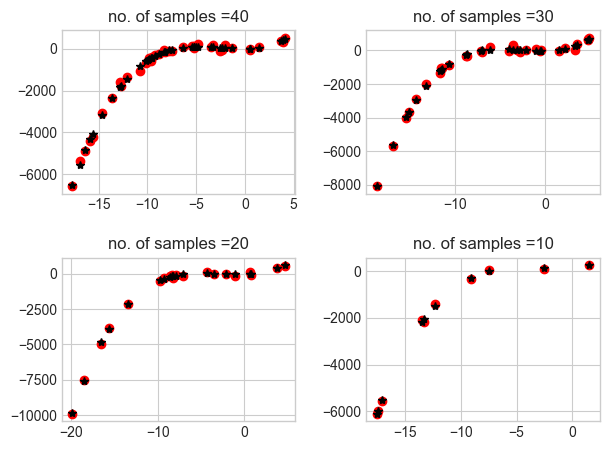

In [12]:
noise_scale = 100 # used initially
number_of_samples_list = [40, 30, 20, 10]
m = 4      # found in 2
MSE_list = []
print('Number of samples \t \t MSE')
for index, number_of_samples in enumerate(number_of_samples_list):
    x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
    y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
    curve = np.polyfit(x.flatten(), y.flatten(), m)        
    y_predicted = np.poly1d(curve)                                  
    MSE = np.square(np.subtract(y, y_predicted(x))).mean()     # Calculating MSE
    MSE_list.append(MSE)                                # storing MSE for comparison with noise_scale
    
    
    plt.tight_layout(pad=1.8, h_pad=None, w_pad=None, rect=None)
    plt.subplot(2,2,index+1)
    plt.plot(x,y,'ro')
    plt.plot(x,y_predicted(x),'k*')
    plt.title('no. of samples =' + str(number_of_samples))
    plt.grid(True)
    print(number_of_samples,'\t\t\t',MSE_list[index])